In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 500

In [3]:
#Datos sintéticos
MedInc = np.random.lognormal(mean=2.5, sigma=.35, size=n)
HouseAge = np.random.randint(1,52,size=n)
Longitude = -124 + np.random.rand(n)*10
Latitude = 32 + np.random.rand(n)*8
AveRooms = 5 + .15*MedInc + .03*HouseAge + np.random.randn(n)

#Target
target = (
    .45*MedInc
    -.02*HouseAge
    -.3*(Latitude-36)
    -.1*(Longitude+119)
    +.02*AveRooms
    +np.random.randn(n)*.5
)

df = pd.DataFrame(
    {
        "MedInc":MedInc,
        "HouseAge":HouseAge,
        "Longitude":Longitude,
        "Latitude":Latitude,
        "AveRooms":AveRooms,
        "target":target
    }
)

numeric_cols = df.columns.tolist()

In [4]:
cov_mat = df[numeric_cols].cov()
corr_mat = df[numeric_cols].corr()

print(f"Covariance matrix:\n{cov_mat.round(3)}")
print(f"\nCorrelation matrix:\n{corr_mat.round(3)}")

Covariance matrix:
           MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc     22.967    -3.196      0.114     0.694     3.275  10.239
HouseAge   -3.196   222.304     -2.162    -0.080     5.950  -5.057
Longitude   0.114    -2.162      8.644     0.390    -0.140  -0.867
Latitude    0.694    -0.080      0.390     5.031    -0.049  -1.247
AveRooms    3.275     5.950     -0.140    -0.049     1.587   1.412
target     10.239    -5.057     -0.867    -1.247     1.412   5.444

Correlation matrix:
           MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc      1.000    -0.045      0.008     0.065     0.542   0.916
HouseAge   -0.045     1.000     -0.049    -0.002     0.317  -0.145
Longitude   0.008    -0.049      1.000     0.059    -0.038  -0.126
Latitude    0.065    -0.002      0.059     1.000    -0.017  -0.238
AveRooms    0.542     0.317     -0.038    -0.017     1.000   0.480
target      0.916    -0.145     -0.126    -0.238     0.480   1.000


In [5]:
#Hat-Matrix
y = df["target"].values.reshape(-1,1)
X = df[["MedInc", "AveRooms", "HouseAge", "Latitude","Longitude"]].values

In [6]:
XtX = X.T @ X
XTX_inv = np.linalg.inv(XtX)
beta = XTX_inv @ X.T @ y
y_hat = X @ beta

residuals = y - y_hat

# Hat Matrix
H = X @ XTX_inv @ X.T
leverage = np.diag(H)
#print(leverage)


In [7]:
print("H", H.shape)
print("y", y.shape)
print("X", X.shape)
print("beta", beta.shape)


H (500, 500)
y (500, 1)
X (500, 5)
beta (5, 1)


In [8]:
summary = pd.DataFrame({
    "index": np.arange(n),
    "leverage": leverage,
    "y": y.flatten(),
    "y_hat": y_hat.flatten(),
    "residuals": residuals.flatten(),
})

In [9]:
print("Top Ten Leverage Points")
print(summary.sort_values("leverage", ascending=False).head(10).round(3))

Top Ten Leverage Points
     index  leverage       y   y_hat  residuals
209    209     0.116  22.630  22.575      0.054
478    478     0.049  16.431  16.136      0.295
179    179     0.035  13.287  14.041     -0.753
416    416     0.030   9.414  10.086     -0.671
362    362     0.029   5.401   5.944     -0.542
378    378     0.029  10.358  11.014     -0.657
323    323     0.027   8.895   9.571     -0.676
113    113     0.025  12.205  12.119      0.087
234    234     0.025   9.303   9.656     -0.353
247    247     0.025   3.236   3.492     -0.256


In [10]:
n,p = X.shape
print("n", n)
print("p", p)

avg_lev = p/n
threshold = 2*avg_lev
print("Average Leverage", avg_lev)
print("Threshold", threshold)

n 500
p 5
Average Leverage 0.01
Threshold 0.02


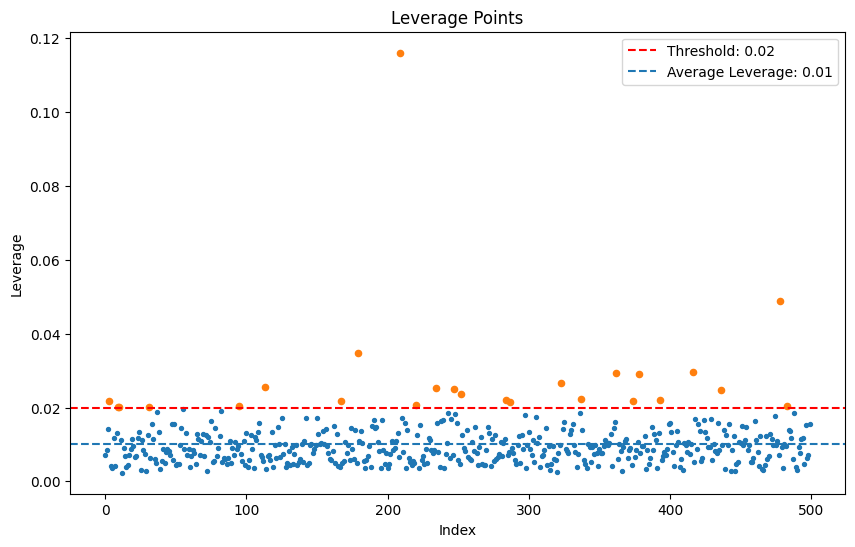

In [11]:
#Plotting leverage points
plt.figure(figsize=(10,6))
plt.scatter(summary["index"],summary["leverage"],s=8)
plt.axhline(y=threshold,color='r',linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.axhline(avg_lev, linestyle='--',label=f'Average Leverage: {avg_lev:.2f}')
hi_idx = summary.index[summary["leverage"]>threshold].tolist()
if len(hi_idx)>0:
  plt.scatter(hi_idx, summary.loc[hi_idx,"leverage"],s=20)
plt.title("Leverage Points")
plt.xlabel("Index")
plt.ylabel("Leverage")
plt.legend()
plt.show()

In [12]:
#Leverage points
import statsmodels.api as sm


In [13]:
#Generate synthetic data
np.random.seed(0)
#Normal house
house_size = np.random.normal(2000,400,100)
house_price = 100 + .5* house_size + np.random.normal(0,20000,100)

#Add few mansions
house_size = np.append(house_size, [5000,6000,7000])
house_price = np.append(house_price, [450000, 550000, 800000])

# Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()


In [14]:
#Printing model parameters
print("Model with mansions: ")
print(f"Intercept: {model.params[0]:.2f}")
print(f"Slope: {model.params[1]:.2f}")

Model with mansions: 
Intercept: -225040.03
Slope: 114.59


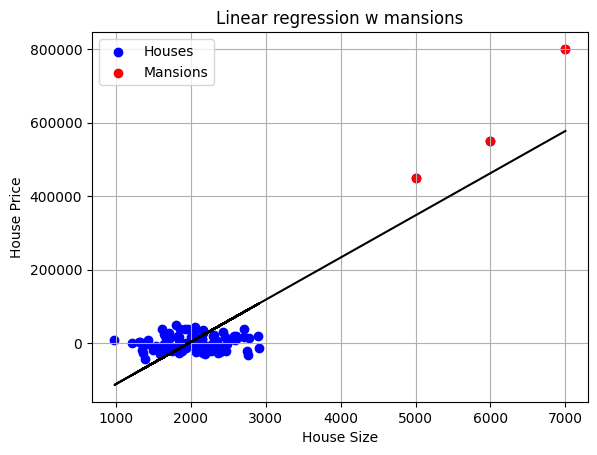

In [15]:
#Plotting the data
plt.scatter(house_size, house_price, label="Houses", color='blue')
plt.scatter(house_size[-3:],house_price[-3:], label="Mansions", color='red')
plt.plot(house_size, model.params[0]+model.params[1]*house_size, color="black")
plt.title("Linear regression w mansions")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Get leverage points
influence =model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

#Threshold
n = len(house_size)
p = 2
avg_lev = p/n
threshold = 2*avg_lev
print(threshold)

0.038834951456310676


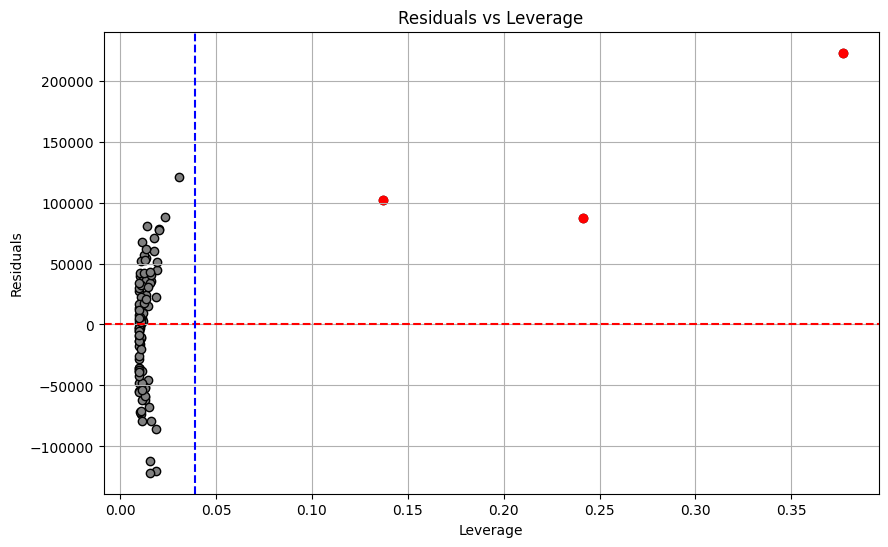

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(leverage, residuals, edgecolors='k', facecolor='gray')
plt.axhline(0,color='r',linestyle='--')
plt.axvline(threshold, color="blue", linestyle='--')
plt.title("Residuals vs Leverage")
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.grid(True)

high_leverage_points= np.where(leverage>threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], color='red', label="High Leverage Points")

plt.show()

In [18]:
print(f"High Leverage Points (index): {high_leverage_points}")
print(f"Leverage Values: {leverage[high_leverage_points]}")

High Leverage Points (index): [100 101 102]
Leverage Values: [0.13694378 0.24146323 0.37708716]


Now we are going to do it with the Boston Housing dataset (Available in the Kaggle), and identifying the leverage points.



In [19]:
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import requests

response = requests.get('http://lib.stat.cmu.edu/datasets/boston')
data = response.text
for i, line in enumerate(data.split('\n')):
    if i<24:
        print(f'{i}   {line}' )
    elif i>1020:
        print(f'{i}   {line}' )

columns = []
for i,line in enumerate(data.split('\n')[:-1]):
    if i > 6 and i <21:
        if re.match('^\s*([A-Z]+)',line):
            columns.append(re.match('^\s*([A-Z]+)',line).groups()[0])
columns


<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3577688032.py:20: SyntaxWarning: invalid escape sequence '\s'
  if re.match('^\s*([A-Z]+)',line):
/tmp/ipython-input-3577688032.py:21: SyntaxWarning: invalid escape sequence '\s'
  columns.append(re.match('^\s*([A-Z]+)',line).groups()[0])


0    The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
1    prices and the demand for clean air', J. Environ. Economics & Management,
2    vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
3    ...', Wiley, 1980.   N.B. Various transformations are used in the table on
4    pages 244-261 of the latter.
5   
6    Variables in order:
7    CRIM     per capita crime rate by town
8    ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
9    INDUS    proportion of non-retail business acres per town
10    CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
11    NOX      nitric oxides concentration (parts per 10 million)
12    RM       average number of rooms per dwelling
13    AGE      proportion of owner-occupied units built prior to 1940
14    DIS      weighted distances to five Boston employment centres
15    RAD      index of accessibility to radial highways
16    TAX      full-value proper

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [20]:
l = {}
for i,line in enumerate(data.split('\n')[:-1]):
    if i>21:
        x = re.findall('[0-9.]+',line)

        if len(x)>3:
            l[i]=x
        else:
            l[i-1].extend(x)
for key in list(l.keys())[:3]:
    print(l[key])

['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900', '1', '296.0', '15.30', '396.90', '4.98', '24.00']
['0.02731', '0.00', '7.070', '0', '0.4690', '6.4210', '78.90', '4.9671', '2', '242.0', '17.80', '396.90', '9.14', '21.60']
['0.02729', '0.00', '7.070', '0', '0.4690', '7.1850', '61.10', '4.9671', '2', '242.0', '17.80', '392.83', '4.03', '34.70']


In [21]:
df=pd.DataFrame(columns=columns)
df.columns=columns
for i in l:
    row = l[i]
    df.loc[i,:]=row
df.reset_index(drop=True,inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
502,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
503,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
504,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00


In [22]:
model_ = sm.OLS(house_price, X).fit()

And now with the diamonds dataset also available in seaborn

In [23]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")

In [24]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [25]:
diamonds = pd.get_dummies(diamonds, columns=['cut', 'color', 'clarity'], drop_first=True)
numeric_features = diamonds.select_dtypes(include=np.number).columns.tolist()

In [26]:
y = diamonds['price']
X_columns = [col for col in numeric_features if col != 'price']
X = diamonds[X_columns]
X = sm.add_constant(X)

In [27]:
XtX = X.values.T @ X.values
XTX_inv = np.linalg.inv(XtX)
beta = XTX_inv @ X.values.T @ y.values.reshape(-1,1)

In [28]:
y_hat = (X.values @ beta).flatten()
residuals = y - y_hat

In [29]:
leverage = np.sum((X.values @ XTX_inv) * X.values, axis=1) #Se hace este paso para no saturar la RAM, dando el mismo resultado

In [30]:
summary = pd.DataFrame({
    "index": np.arange(len(y)),
    "leverage": leverage,
    "y": y.values.flatten(),
    "y_hat": y_hat,
    "residuals": residuals.values.flatten()
})

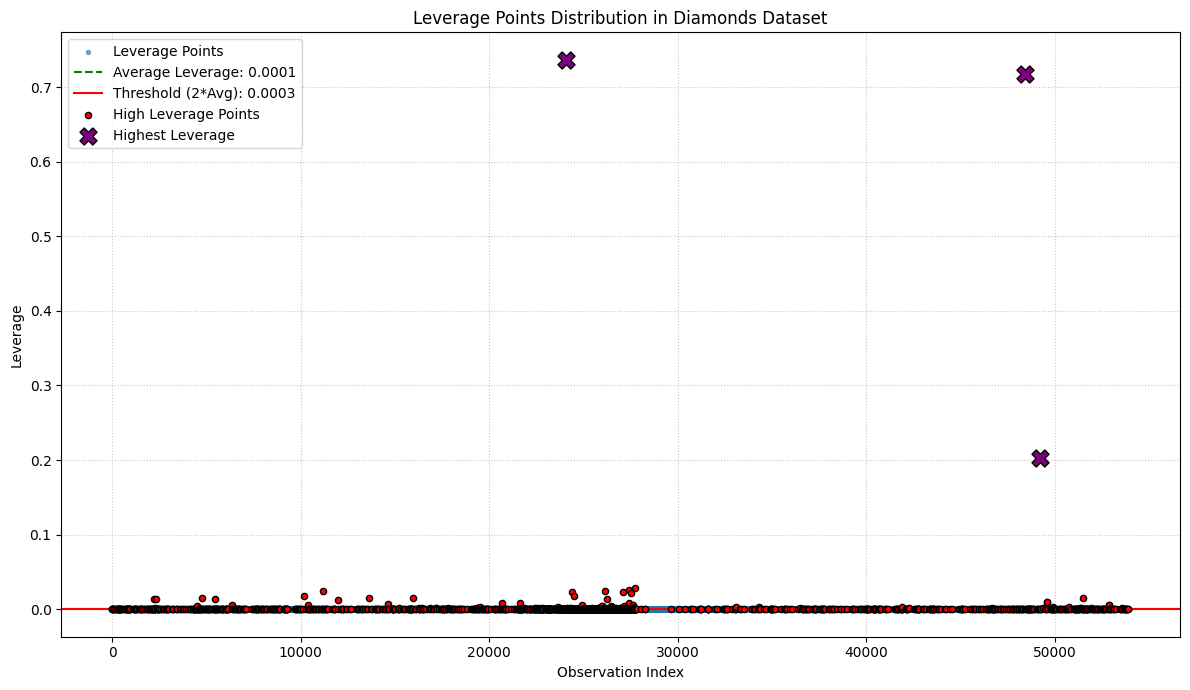

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n, p = X.shape
avg_lev = p / n
threshold = 2 * avg_lev

plt.figure(figsize=(12, 7)) # Increased figure size slightly for better visibility
plt.scatter(summary["index"], summary["leverage"], s=8, alpha=0.6, label='Leverage Points')
plt.axhline(y=avg_lev, color='green', linestyle='--', label=f'Average Leverage: {avg_lev:.4f}')
plt.axhline(y=threshold, color='red', linestyle='-', label=f'Threshold (2*Avg): {threshold:.4f}')

high_leverage_idx = summary.index[summary["leverage"] > threshold].tolist()

if len(high_leverage_idx) > 0:
    plt.scatter(high_leverage_idx, summary.loc[high_leverage_idx, "leverage"], s=20, color='red', edgecolor='black', zorder=5, label='High Leverage Points')

    highest_leverage = summary.loc[high_leverage_idx].sort_values(by="leverage", ascending=False).head(3)
    if not highest_leverage.empty:
        plt.scatter(highest_leverage["index"], highest_leverage["leverage"], s=150, color='purple', marker='X', edgecolor='black', zorder=10, label='Highest Leverage')

plt.title("Leverage Points Distribution in Diamonds Dataset")
plt.xlabel("Observation Index")
plt.ylabel("Leverage")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()